In [17]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from utils import soft_tissue_window

In [11]:
img = nib.load('data/training/slices/img/img0001_120.nii.gz').get_fdata()
label = nib.load('data/training/slices/label/label0001_120.nii.gz').get_fdata()

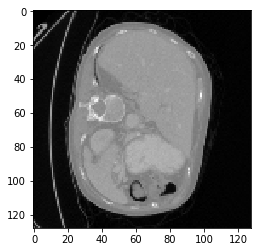

In [12]:
%matplotlib inline
plt.imshow(img, cmap='gray')

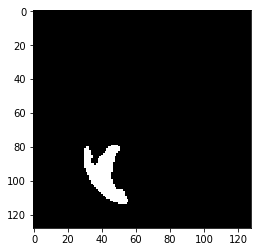

In [13]:
%matplotlib inline
plt.imshow(label, cmap='gray')

In [14]:
img_original = nib.load('data/training/img/img0001.nii.gz').get_fdata()[:,:,120]
label_original =  nib.load('data/training/label/label0001.nii.gz').get_fdata()[:,:,120]

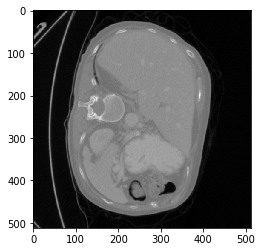

In [15]:
%matplotlib inline
plt.imshow(img_original, cmap='gray')

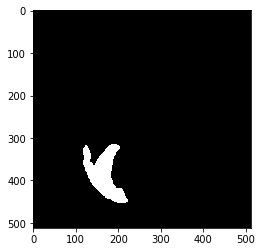

In [16]:
%matplotlib inline
spleen_original = label_original
spleen_original[np.where(spleen_original != 1)] = 0
plt.imshow(spleen_original, cmap='gray')

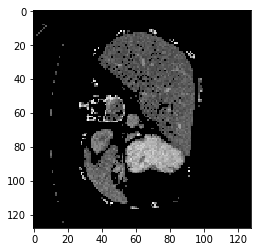

In [18]:
windowed_img = soft_tissue_window(img)
%matplotlib inline
plt.imshow(windowed_img, cmap='gray')

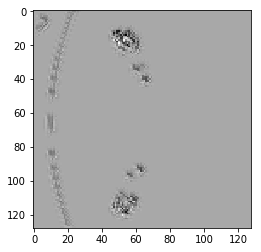

In [20]:
prediction = nib.load('data/testing/slices/pred/img0061_0.nii.gz').get_fdata()
%matplotlib inline
plt.imshow(prediction, cmap='gray')

In [29]:
# import os
# img_path = 'data/testing/slices/img'
# for img_id in os.listdir('data/testing/img'):
#     all_img_slices = [item for item in os.listdir(img_path) if img_id[0:-7] in item]
#     for item in all_img_slices:
#         print(item)

SyntaxError: unexpected EOF while parsing (<ipython-input-29-a2ecbbace401>, line 6)

In [36]:
import os
from utils import save
img_folder = 'data/testing/slices/pred/'
out_folder = 'data/testing/results/'
img_id = 'img0077.nii.gz'
img_slices = [item for item in os.listdir(img_folder) if img_id[0:-7] in item]
num_slices = len(img_slices)
vol_img = np.zeros((128, 128, num_slices))
for index, item in zip(range(num_slices), img_slices):
    img=nib.load(img_folder+item).get_fdata()
    vol_img[:,:,index] = img
save(vol_img, out_folder+img_id)

(128, 128, 15)


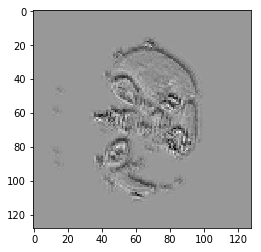

In [37]:
result = nib.load('data/testing/results/img0077.nii.gz').get_fdata()
print(np.shape(result))
%matplotlib inline
plt.imshow(result[:,:, 4], cmap='gray')

In [27]:
import scipy.interpolate
import numpy as np
import nibabel as nib

data = nib.load('data/training/slices/img/img0001_120.nii.gz')
img = data.get_fdata()
factor = 4
# img_upsamp = img.repeat(factor, axis = 0).repeat(factor, axis = 1)
# x = np.array(range(512))
# y = np.array(range(512))
# #xx, yy = np.meshgrid(x, y)
# img_interp = interpolate.interp2d(x, y, img_upsamp)
# print(np.shape(img_interp))

from skimage.transform import resize
img_interp = scipy.misc.imresize(img, float(factor))
print(np.shape(img_interp))

(512, 512)


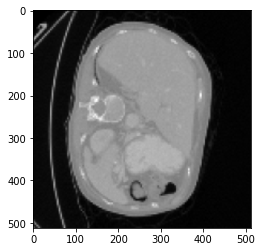

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img_interp, cmap='gray')